In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# PyTorch custom datasets





In [2]:
# Setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get data
here the dataset is a subset of the Food101 dataset.

It contains only 10% of the images (~75 training and ~25 testing)

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesnt exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} directory doesnt exist... creating one")
  image_path.mkdir(parents=True, exist_ok=True)

# Download the data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

# Unzip the data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory doesnt exist... creating one


## 2. Data prep and exploration

In [4]:
import os
def walk_through_dir(dir_path):
  """Displays the brief overview of a given directory."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'


In [5]:
# Setting up training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualising the images

Random image path: data/pizza_steak_sushi/test/sushi/2276986.jpg
image class: sushi
image height: 512
image width: 512


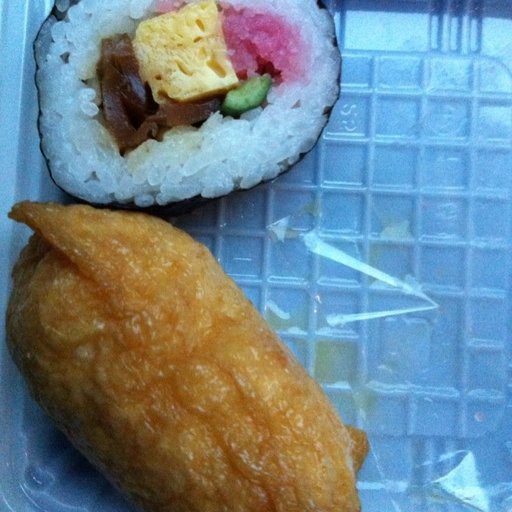

In [6]:
import random
from PIL import Image

# Set the seed
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

# image class is the name of the directory in which image is stored
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

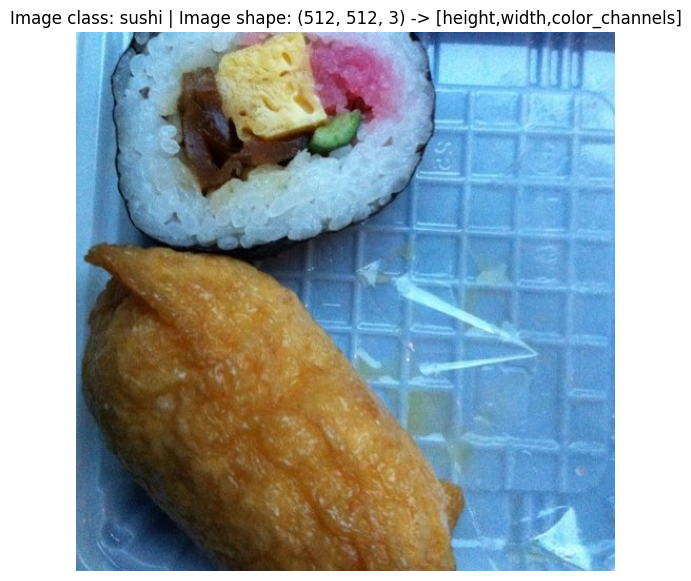

In [7]:
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False);

In [8]:
print(img_as_array)

[[[149 229 254]
  [145 225 250]
  [129 206 236]
  ...
  [ 60  95 153]
  [ 67  99 160]
  [ 65  97 158]]

 [[154 231 255]
  [148 225 251]
  [138 215 245]
  ...
  [ 63  98 156]
  [ 69 101 162]
  [ 66  98 159]]

 [[152 228 254]
  [144 220 246]
  [142 217 248]
  ...
  [ 64  96 155]
  [ 67  99 158]
  [ 62  94 153]]

 ...

 [[ 66 119 153]
  [ 75 128 162]
  [ 77 129 166]
  ...
  [138 191 235]
  [137 190 234]
  [157 210 254]]

 [[ 74 124 159]
  [ 80 130 165]
  [ 81 131 168]
  ...
  [148 199 244]
  [157 208 253]
  [159 210 253]]

 [[ 82 132 167]
  [ 85 135 170]
  [ 85 133 171]
  ...
  [149 200 245]
  [168 217 255]
  [150 199 242]]]


## 3. Transforming data into tensors

In [9]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
transform_data = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() # turns the image into torch.Tensor
])

In [11]:
transform_data(img)

tensor([[[0.4902, 0.4902, 0.4863,  ..., 0.2471, 0.2392, 0.2392],
         [0.4667, 0.4824, 0.4824,  ..., 0.2941, 0.2784, 0.2706],
         [0.4471, 0.4706, 0.4980,  ..., 0.5020, 0.4824, 0.4549],
         ...,
         [0.3569, 0.3216, 0.3059,  ..., 0.4471, 0.4000, 0.3686],
         [0.3882, 0.3490, 0.3176,  ..., 0.4157, 0.3490, 0.4000],
         [0.3412, 0.3725, 0.3412,  ..., 0.4431, 0.3804, 0.4549]],

        [[0.7647, 0.7725, 0.8039,  ..., 0.3843, 0.3765, 0.3725],
         [0.7490, 0.7725, 0.8000,  ..., 0.4471, 0.4353, 0.4196],
         [0.7451, 0.7725, 0.8000,  ..., 0.7294, 0.7137, 0.6706],
         ...,
         [0.5373, 0.4980, 0.4824,  ..., 0.7373, 0.6667, 0.6431],
         [0.5608, 0.5294, 0.4941,  ..., 0.6980, 0.6118, 0.6627],
         [0.5373, 0.5686, 0.5333,  ..., 0.7137, 0.6471, 0.6863]],

        [[0.9059, 0.9373, 0.9569,  ..., 0.5922, 0.5804, 0.5922],
         [0.8980, 0.9412, 0.9608,  ..., 0.6627, 0.6471, 0.6314],
         [0.8980, 0.9412, 0.9529,  ..., 0.9059, 0.8824, 0.

In [12]:
transform_data(img).shape

torch.Size([3, 64, 64])

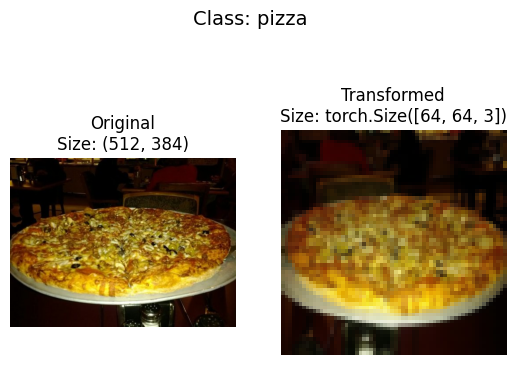

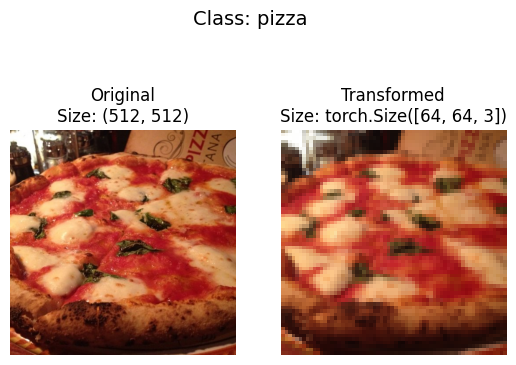

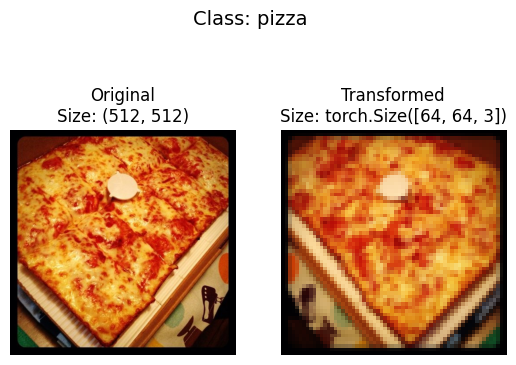

In [13]:
# Let's visualise the transformed images
def plot_transformed_image(image_paths: list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0) # matplotlib expects the HWC format, so we use permute here
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=14)

plot_transformed_image(image_path_list,
                       transform=transform_data,
                       n=3,
                       seed=None)

## 4. Option1: Loading image data using `ImageFolder`
ImageFolder is a prebuilt datasets function

In [14]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir,
                                   transform=transform_data,
                                   target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform_data,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [18]:
# Index on the train data to get a single image and its label
img, label = train_data[0][0] , train_data[0][1]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Image class: {class_names[label]}")

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

### 4.1 Turn loaded image data into `DataLoader`
A dataloader helps us to turn Dataset into iterables

In [19]:
# Lets turn train data and test data into DataLoader
BATCH_SIZE = 1 # hyperparam
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1, # no of CPU cores used to load the data , use os.cpu_count() as value if more cpus needed
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f630448fc50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6304561350>)

In [20]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [21]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 5. Option 2: Loading image data using a Custom `Dataset`
* load images from a file
* get class names from the dataset
* get classes as dictionary from the dataset
>Note: We can create a `Dataset` almost out of anything, but it also means writing more code that could have errors or lead to performance issues



In [22]:
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

### 5.1 Get class names from the directory

In [23]:
# create a target directory
target_dir = train_dir

# Get class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

['pizza', 'steak', 'sushi']

In [25]:
list(os.scandir(target_dir))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [24]:
# A helper function that we will use in our custom dataset
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Find class folder names in the target directory"""
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  classes_to_idx = {class_name: idx for idx, class_name in enumerate(classes)}

  return classes, classes_to_idx

In [25]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a Custom `Dataset` to replicate `ImageFolder`

In [26]:
# Write a custom dataset class
import pathlib
class ImageFolderCustom(Dataset):
  # Initialise the custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    """Opens an image via path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label (X, y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_to_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_to_idx # transformed img and label
    else:
      return img, class_to_idx # untransformed img and label


In [27]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # data augmentation technique used to increase diversity of training data
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [28]:
# Test the ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f63044bc290>,
 <__main__.ImageFolderCustom at 0x7f630451f890>)

In [29]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [32]:
train_data_custom.classes , test_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [30]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [31]:
train_data_custom.load_image(1), test_data_custom.load_image(1)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=511x512>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x333>)

In [32]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

### 5.3 Create a function to display random images


In [33]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]= None,
                          n : int = 10, # no of images to display
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n= 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting n = 10 and display_shape = False")

  if seed:
    random.seed(seed)

  random_sample_idxs = random.sample(range(len(train_data_custom)), k=n)
  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_sample_idxs):
    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_img_adjust = targ_img.permute(1,2,0) # matplotlib works with HWC order
    # Plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adjust)
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_img_adjust.shape}"
    plt.title(title)
    plt.axis("off")


For display purposes, n shouldn't be larger than 10, setting n = 10 and display_shape = False


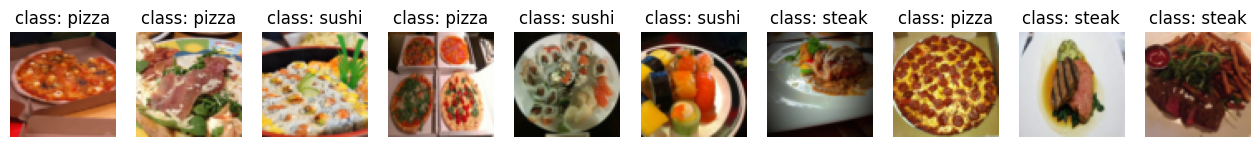

In [34]:
# Show random images from ImageFolderCustom dataset
display_random_images(train_data_custom,
                      class_names,
                      n=15,
                      seed=None)

### 5.4 Turn image data from custom dataset into dataloader

In [35]:
BATCH_SIZE = 1 # hyperparam
train_custom_dataloader = DataLoader(dataset=train_data_custom,
                              batch_size=BATCH_SIZE,
                              num_workers=1, # no of CPU cores used to load the data , use os.cpu_count() as value if more cpus needed
                              shuffle=True)

test_custom_dataloader = DataLoader(dataset=test_data_custom,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_custom_dataloader, test_custom_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f63045f5790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6304270490>)

In [36]:
img, label = next(iter(train_custom_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Experimenting with data augmentation (other forms of transforms)
Data augmentation is the process of artifically adding diversity to training data. This helps us to view images from different angles and perspectives.

In [37]:
# 1. TrivialAugment

train_transforms = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

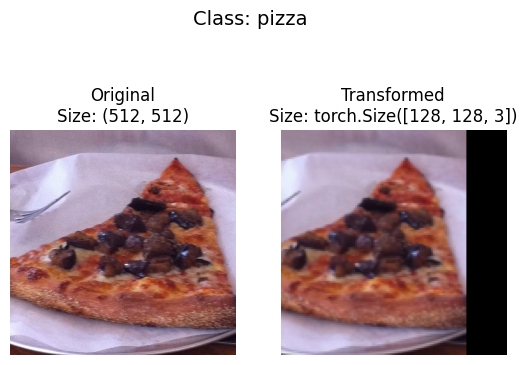

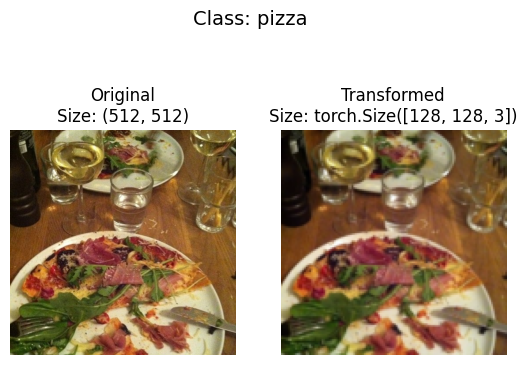

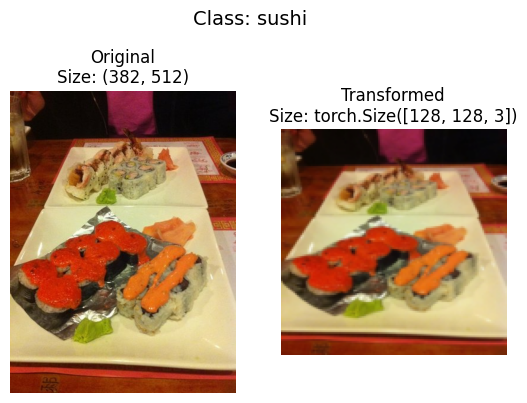

In [38]:
plot_transformed_image(image_path_list,
                       transform=train_transforms,
                       n=3,
                       seed=None)

## 7. Model 0: TinyVGG without data augmentation

### 7.1 Load data and create transforms

In [39]:
# Create transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [40]:
# Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                         target_transform=None)

test_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                         target_transform=None)

# Turn data into dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f62fff444d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f62fff7b6d0>)

In [41]:
len(train_dataloader_simple), len(test_dataloader_simple)

(8, 8)

In [42]:
img, label = next(iter(train_dataloader_simple))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 7.2 Create TinyVGG model class

In [43]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion - speeds up computation on GPUs.


In [44]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # no of color channels in the image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [45]:
model_0.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
                 

### 7.3 Trying forward pass on a single image to test the model

In [46]:
# Create a image batch and a label batch
image_batch, label_batch = next(iter(train_dataloader_simple))

In [47]:
# do the forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Print model summary using `torchinfo`

In [48]:
!pip install torchinfo

In [49]:
from torchinfo import summary
model_summary = summary(model_0, input_size=[1,3,64,64])
model_summary

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Creating training and testing loop functions

In [50]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()
  train_loss, train_acc = 0,0

  # loop through dataloader
  for batch, (X, y) in enumerate(dataloader):
    # send data to the target device
    X, y = X.to(device), y.to(device)

    y_pred = model(X) # output raw logits
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate the accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += ((y_pred_class == y).sum().item()/len(y_pred))

  # Return the adjusted loss and accuracy metrics
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [51]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put model in eval mode
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      # Calculate the accuarcy metric
      test_pred_label = test_pred.argmax(dim=1)
      test_acc += ((test_pred_label == y).sum().item()/len(test_pred))

  # Return the adjusted loss and accuracy metrics
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Write a `train` function to combine `train_step` and `test_step`

In [52]:
from tqdm.auto import tqdm

# train function
def train(model: torch.nn.Module,
          train_loader: torch.utils.data.DataLoader,
          test_loader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          epochs: int=5,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          device=device):

  # Create an empty results dictionary
  results = {"train_loss": [],
             "train_accuracy": [],
             "test_loss": [],
             "test_accuracy": []}

  # Loop through the epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model,
                            train_loader,
                            loss_fn,
                            optimizer,
                            device)
    test_loss, test_acc = test_step(model,
                          test_loader,
                          loss_fn,
                          device)

    # Print out what's happening
    print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.4f} | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}")

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_accuracy"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_accuracy"].append(test_acc)

  return results


In [53]:
# Setup loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

### 7.7 Training `model_0`

In [66]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS = 10 # hyperparam

# start the timer
from timeit import default_timer as Timer
start_time = Timer()

model_0 = TinyVGG(input_shape=3, hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0_results = train(model=model_0,
                        train_loader=train_dataloader_simple,
                        test_loader=test_dataloader_simple,
                        optimizer=optimizer,
                        epochs=EPOCHS,
                        loss_fn=loss_fn,
                        device=device)

end_time = Timer()
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0979 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 1 | Train_loss: 1.0986 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 2 | Train_loss: 1.0978 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 3 | Train_loss: 1.0994 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 4 | Train_loss: 1.0978 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 5 | Train_loss: 1.0979 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 6 | Train_loss: 1.0979 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 7 | Train_loss: 1.0992 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 8 | Train_loss: 1.0963 | Train_acc: 0.4258 | Test_loss: 1.0973 | Test_acc: 0.3047
Epoch: 9 | Train_loss: 1.0976 | Train_acc: 0.3047 | Test_loss: 1.0973 | Test_acc: 0.3047
Total training time: 13.642 seconds


In [67]:
model_0_results

{'train_loss': [1.0979430973529816,
  1.098580852150917,
  1.097785621881485,
  1.0993992239236832,
  1.0977774411439896,
  1.0979291200637817,
  1.097927287220955,
  1.099181592464447,
  1.0962589979171753,
  1.0976466685533524],
 'train_accuracy': [0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.42578125,
  0.3046875],
 'test_loss': [1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076,
  1.097295731306076],
 'test_accuracy': [0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875,
  0.3046875]}

### 7.8 Plot the loss curves of model_0

**Loss curve** tracks a model's progress over time

In [68]:
model_0_results.keys()

dict_keys(['train_loss', 'train_accuracy', 'test_loss', 'test_accuracy'])

In [69]:
def plot_loss_curve(results: Dict[str, List[float]]):
  """Plots training curves for a model results dictionary."""
  loss = results['train_loss']
  test_loss = results['test_loss']
  acc = results['train_accuracy']
  test_acc = results['test_accuracy']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(14,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label='train_accuracy')
  plt.plot(epochs, test_acc, label='test_accuracy')
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

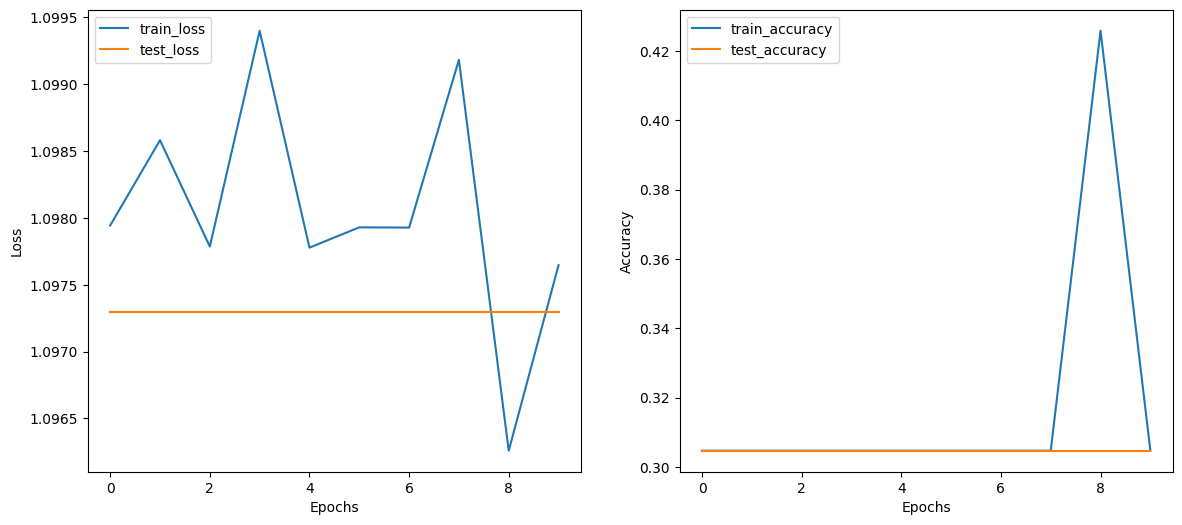

In [58]:
plot_loss_curve(model_0_results)

## 8. Model 1: TinyVGG with Data Augmentation

### 8.1 Create transform with data augmentation

In [70]:
train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

### 8.2 Create train and test `datasets` and `dataloaders` with data augmentation

In [71]:
# Create augmented datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial,
                                            target_transform=None)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                            transform=test_transforms_simple,
                                            target_transform=None)

len(train_data_augmented), len(test_data_simple)

(225, 75)

In [72]:
# Turn datasets into dataloaders
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42) # we will shuffle the training data here
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_dataloader_new = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=False)

### 8.3 Constructing and training Model 1


In [140]:
# Create model 1
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=13,
                  output_shape=len(class_names)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 13, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(13, 13, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(13, 13, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(13, 13, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2197, out_features=3, bias=True)
  )
)

In [141]:
# Train model 1 on augmented data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10 # hyperparam

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as Timer
start_time = Timer()

model_1_results = train(model=model_1,
                        train_loader=train_dataloader_augmented,
                        test_loader=test_dataloader_new,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS,
                        loss_fn=loss_fn,
                        device=device)

end_time = Timer()
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1038 | Train_acc: 0.2500 | Test_loss: 1.0959 | Test_acc: 0.2812
Epoch: 1 | Train_loss: 1.0941 | Train_acc: 0.4258 | Test_loss: 1.1013 | Test_acc: 0.2604
Epoch: 2 | Train_loss: 1.0865 | Train_acc: 0.4258 | Test_loss: 1.1113 | Test_acc: 0.2604
Epoch: 3 | Train_loss: 1.1109 | Train_acc: 0.3047 | Test_loss: 1.1268 | Test_acc: 0.2604
Epoch: 4 | Train_loss: 1.0819 | Train_acc: 0.4258 | Test_loss: 1.1284 | Test_acc: 0.2604
Epoch: 5 | Train_loss: 1.0983 | Train_acc: 0.3047 | Test_loss: 1.1374 | Test_acc: 0.2604
Epoch: 6 | Train_loss: 1.0866 | Train_acc: 0.3125 | Test_loss: 1.1114 | Test_acc: 0.3021
Epoch: 7 | Train_loss: 1.0662 | Train_acc: 0.5000 | Test_loss: 1.0768 | Test_acc: 0.3125
Epoch: 8 | Train_loss: 1.1008 | Train_acc: 0.3711 | Test_loss: 1.0853 | Test_acc: 0.3229
Epoch: 9 | Train_loss: 1.0392 | Train_acc: 0.4141 | Test_loss: 0.9554 | Test_acc: 0.6042
Total training time: 10.766 seconds


### 8.4 Plot the loss curves of `model_1`

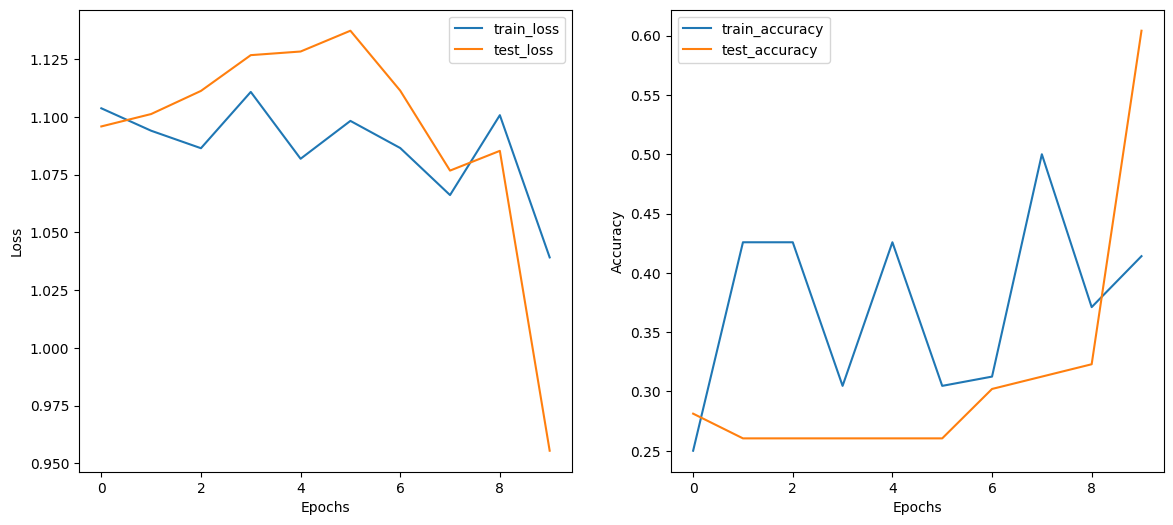

In [142]:
plot_loss_curve(model_1_results)

## 9. Compare model results

some ways to do this:
* hard coding
* MlFlow
* Weights and Biases

### 9.1 Using `Weights and Biases`

In [ ]:
import wandb
import torch
from torch import nn

# 1. Start a new run
run_model_0 = wandb.init(project="custom_datasets")
# 2. Save model inputs and hyperparameters
config_0 = run_model_0.config
config_0.dropout = 0.01
config_0.num_epochs = NUM_EPOCHS # Log the number of epochs
config_0.batch_size = BATCH_SIZE # Log the batch size
config_0.learning_rate = optimizer.param_groups[0]['lr'] # Log the learning rate

# 3. Log gradients and model parameters (optional, can be resource intensive)
# run.watch(model_1) # Keep commented out unless you specifically need to log gradients

# The loop below is for demonstrating batch processing, but logging metrics
# here without calculating them will cause an error.
# Since you are already calculating epoch-level metrics in your 'train' function,
# it is more efficient to log those results after training.
# Removing the erroneous batch logging loop:
# for batch_idx, (data, target) in enumerate(train_dataloader_augmented):
#   if batch_idx % log_interval == 0:
#    run.log({"loss": loss})
#    pass

# Log the epoch-level results after the training is complete
# Ensure model_1_results is available in this scope (it is from the previous cell)
if 'model_0_results' in locals():
    for epoch in range(len(model_0_results['train_loss'])):
        run_model_0.log({
            "epoch": epoch,
            "train_loss": model_0_results['train_loss'][epoch],
            "train_accuracy": model_0_results['train_accuracy'][epoch],
            "test_loss": model_0_results['test_loss'][epoch],
            "test_accuracy": model_0_results['test_accuracy'][epoch]
        })

print("Finished evaluating model 0")

# End the W&B run
run_model_0.finish()

run_model_1 = wandb.init(project="custom_datasets")
config_1 = run_model_1.config
config_1.dropout = 0.01
config_1.num_epochs = NUM_EPOCHS # Log the number of epochs
config_1.batch_size = BATCH_SIZE # Log the batch size
config_1.learning_rate = optimizer.param_groups[0]['lr']

if 'model_1_results' in locals():
    for epoch in range(len(model_1_results['train_loss'])):
        run_model_1.log({
            "epoch": epoch,
            "train_loss": model_1_results['train_loss'][epoch],
            "train_accuracy": model_1_results['train_accuracy'][epoch],
            "test_loss": model_1_results['test_loss'][epoch],
            "test_accuracy": model_1_results['test_accuracy'][epoch]
        })
print("Finished evaluating model 1")

run_model_1.finish()

Finished evaluating model 0


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▁█▁▁███
train_loss,████▁██▁▁▁
epoch,9
test_accuracy,0.40234
test_loss,1.09431
train_accuracy,0.40234
train_loss,1.09431


Finished evaluating model 1


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
test_accuracy,▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂█
test_loss,▃▄▄▅▆▇▇██▇▆▆▅▅▅▆▆▇▇▇▆▆▅▄▃▄▄▃▂▁
train_accuracy,▁▇█▂█▂▂█▂██▂███████▂█▂▂▂█▂▂▂▂▂
train_loss,▄▃▃▅▂▅▄▃▇▃▂▇▂▂▂▁▁▁▁█▁▇▇▆▂▆▅▅▄▄
epoch,29
test_accuracy,0.54167
test_loss,1.0864
train_accuracy,0.30469
train_loss,1.09619


### 9.2 Using hard coding

In [143]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_accuracy,test_loss,test_accuracy
0,1.097943,0.304688,1.097296,0.304688
1,1.098581,0.304688,1.097296,0.304688
2,1.097786,0.304688,1.097296,0.304688
3,1.099399,0.304688,1.097296,0.304688
4,1.097777,0.304688,1.097296,0.304688
5,1.097929,0.304688,1.097296,0.304688
6,1.097927,0.304688,1.097296,0.304688
7,1.099182,0.304688,1.097296,0.304688
8,1.096259,0.425781,1.097296,0.304688
9,1.097647,0.304688,1.097296,0.304688


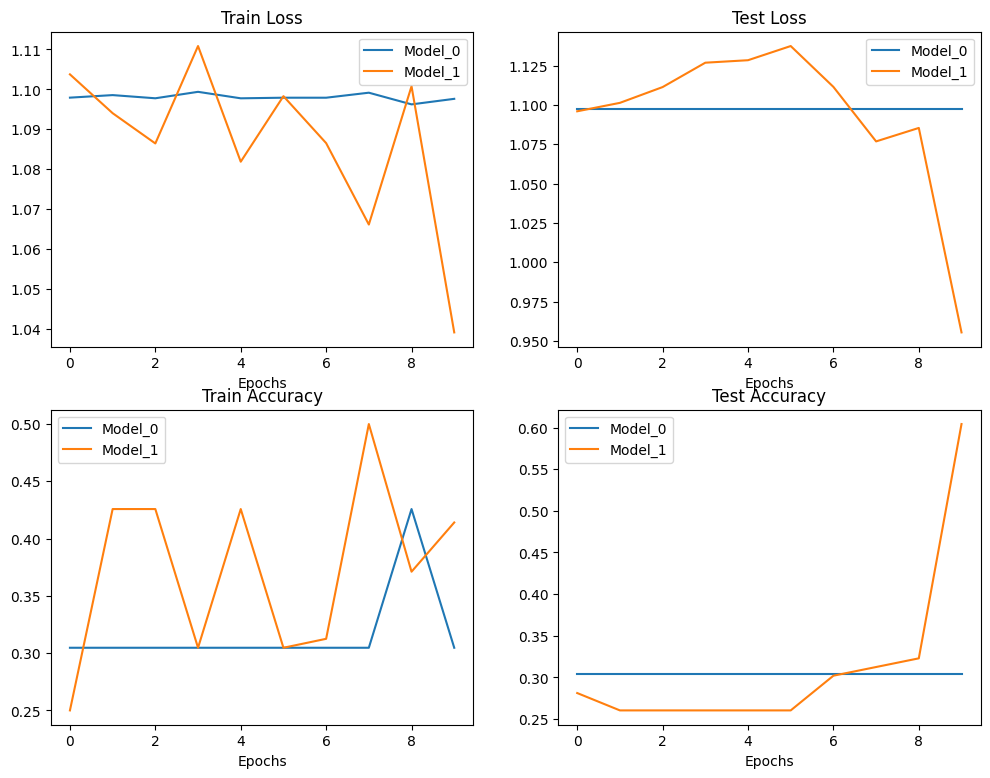

In [144]:
# setup a plot
plt.figure(figsize=(12,9))

# get no of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label='Model_0')
plt.plot(epochs, model_1_df['train_loss'], label='Model_1')
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label='Model_0')
plt.plot(epochs, model_1_df['test_loss'], label='Model_1')
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();

# Plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_accuracy'], label='Model_0')
plt.plot(epochs, model_1_df['train_accuracy'], label='Model_1')
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend();

# plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_accuracy'], label='Model_0')
plt.plot(epochs, model_1_df['test_accuracy'], label='Model_1')
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 10. Let's make predictions on a custom image now

In [78]:
import requests

# Create path for custom img
custom_image_path = data_path / "Big_pizza.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/Saloni0512/ImageData/main/Big_pizza.jpeg")
    f.write(request.content)
    print(f"Dowloading {custom_image_path}...")
else:
  print(f"{custom_image_path} already exist, skipping download")


Dowloading data/Big_pizza.jpeg...


### 10.1 Loading a custom image as tensor
* The image must be of size (64,64,3).
* The dtype of image tensor must be float32
* It must be on the same device

In [79]:
custom_image_path

PosixPath('data/Big_pizza.jpeg')

In [80]:
import torchvision

# Read in image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[157, 156, 155,  ...,  84,  84,  84],
         [158, 157, 155,  ...,  81,  80,  80],
         [157, 156, 154,  ...,  76,  76,  74],
         ...,
         [241, 241, 241,  ..., 236, 236, 236],
         [241, 241, 241,  ..., 236, 236, 235],
         [240, 240, 240,  ..., 236, 235, 235]],

        [[126, 125, 125,  ..., 140, 140, 140],
         [126, 127, 125,  ..., 137, 138, 138],
         [125, 124, 122,  ..., 134, 134, 135],
         ...,
         [232, 232, 232,  ..., 229, 229, 229],
         [232, 232, 232,  ..., 230, 230, 229],
         [231, 231, 231,  ..., 230, 229, 229]],

        [[131, 130, 127,  ..., 187, 187, 187],
         [129, 129, 127,  ..., 184, 186, 186],
         [128, 127, 125,  ..., 182, 182, 182],
         ...,
         [217, 217, 217,  ..., 219, 219, 219],
         [217, 217, 217,  ..., 218, 218, 217],
         [216, 216, 216,  ..., 218, 217, 217]]], dtype=torch.uint8)

In [82]:
custom_image_uint8.shape, custom_image_uint8.dtype

(torch.Size([3, 667, 1000]), torch.uint8)

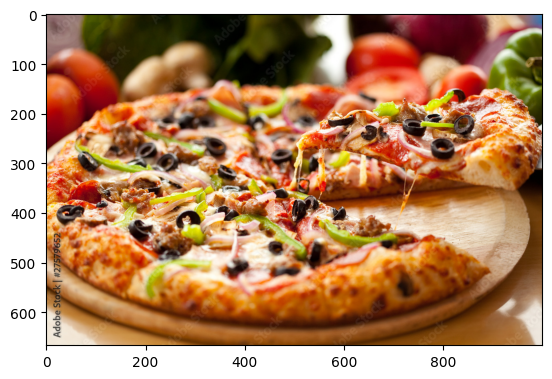

In [81]:
plt.imshow(custom_image_uint8.permute(1,2,0))

### 10.2 Making a prediction on the custom image with our trained model

In [84]:
# load in the image and convert it to torch.float32
custom_image_tensor = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image_tensor

tensor([[[0.6157, 0.6118, 0.6078,  ..., 0.3294, 0.3294, 0.3294],
         [0.6196, 0.6157, 0.6078,  ..., 0.3176, 0.3137, 0.3137],
         [0.6157, 0.6118, 0.6039,  ..., 0.2980, 0.2980, 0.2902],
         ...,
         [0.9451, 0.9451, 0.9451,  ..., 0.9255, 0.9255, 0.9255],
         [0.9451, 0.9451, 0.9451,  ..., 0.9255, 0.9255, 0.9216],
         [0.9412, 0.9412, 0.9412,  ..., 0.9255, 0.9216, 0.9216]],

        [[0.4941, 0.4902, 0.4902,  ..., 0.5490, 0.5490, 0.5490],
         [0.4941, 0.4980, 0.4902,  ..., 0.5373, 0.5412, 0.5412],
         [0.4902, 0.4863, 0.4784,  ..., 0.5255, 0.5255, 0.5294],
         ...,
         [0.9098, 0.9098, 0.9098,  ..., 0.8980, 0.8980, 0.8980],
         [0.9098, 0.9098, 0.9098,  ..., 0.9020, 0.9020, 0.8980],
         [0.9059, 0.9059, 0.9059,  ..., 0.9020, 0.8980, 0.8980]],

        [[0.5137, 0.5098, 0.4980,  ..., 0.7333, 0.7333, 0.7333],
         [0.5059, 0.5059, 0.4980,  ..., 0.7216, 0.7294, 0.7294],
         [0.5020, 0.4980, 0.4902,  ..., 0.7137, 0.7137, 0.

Transformed image shape: torch.Size([3, 64, 64])


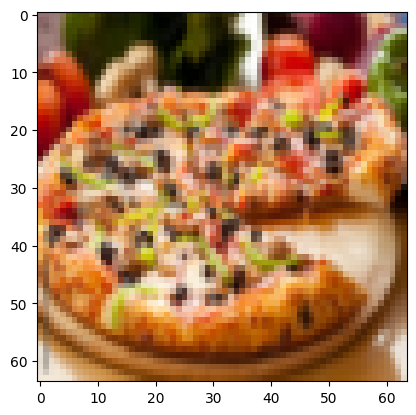

In [88]:
# Create a transform to reduce the shape of image
custom_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
])

custom_image_transformed = custom_transform(custom_image_tensor)
print(f"Transformed image shape: {custom_image_transformed.shape}")
plt.imshow(custom_image_transformed.permute(1,2,0))

In [90]:
# We need to add a batch size here
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [145]:
# This should run successfully
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[-0.0099, -0.8894,  0.2046]], device='cuda:0')

> Note: Here, we get raw logits as predictions of the pizza, steak and sushi classes.

In [146]:
# Convert logits into pred probs
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3768, 0.1564, 0.4669]], device='cuda:0')

In [147]:
# Convert pred probs into pred labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([2], device='cuda:0')

In [148]:
class_names[custom_image_pred_label]

'sushi'

### 10.3 Functionising the prediction of custom image